<a href="https://colab.research.google.com/github/RickyF404/Tesi/blob/main/LOF_Time_windows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt
import gdown

In [4]:
url_no_temp = "https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o"
output_no_temp = "data_no_temperature.csv"
gdown.download(url_no_temp, output_no_temp)

url_temp = " https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH"
output_temp = "data_temperature.csv"
gdown.download(url_temp, output_temp)

Downloading...
From: https://drive.google.com/uc?id=1jerpsOqjogEnnriBkHOrDDEeh1wJry_o
To: /content/data_no_temperature.csv
100%|██████████| 1.44M/1.44M [00:00<00:00, 134MB/s]
Downloading...
From:  https://drive.google.com/uc?id=1RofjUHZS_UAnbF6Xe74jTp9z4Mmk7swH
To: /content/data_temperature.csv
100%|██████████| 1.66M/1.66M [00:00<00:00, 98.7MB/s]


'data_temperature.csv'

In [7]:
# df_original = pd.read_csv("/content/drive/MyDrive/data_no_temperature.csv", encoding = "utf-8")

df_original = pd.read_csv("/content/data_no_temperature.csv", encoding = "utf-8")
df_original["timestamp"] = pd.to_datetime(df_original["timestamp"])
df_original["timestamp"] = df_original["timestamp"].dt.tz_localize(None)
df_original = df_original.sort_values("timestamp")

end = "2025-01-01"
df = df_original[(df_original["timestamp"] < end)]

In [8]:
def anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01):
  scaler = StandardScaler()
  # scaler = RobustScaler()
  X_train = scaler.fit_transform(train_df[features])
  X_valid = scaler.transform(valid_df[features])

  lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)
  lof.fit(X_train)

  y_pred = lof.predict(X_valid)
  anomaly_rate = np.mean(y_pred == -1)
  return anomaly_rate

# Finestra di 2 mesi

In [9]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_2m = []
window_size = 2
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly_2m_real = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results_2m.append({"train_months": [str(x) for x in train_months], "window_size": len(train_months), "anomaly rate 0.01": anomaly_2m_real})

results_df_2m = pd.DataFrame(results_2m)
print(results_df_2m)

          train_months  window_size  anomaly rate 0.01
0   [2024-01, 2024-02]            2           0.131210
1   [2024-02, 2024-03]            2           0.184444
2   [2024-03, 2024-04]            2           0.088025
3   [2024-04, 2024-05]            2           0.027859
4   [2024-05, 2024-06]            2           0.026366
5   [2024-06, 2024-07]            2           0.044543
6   [2024-07, 2024-08]            2           0.043219
7   [2024-08, 2024-09]            2           0.040788
8   [2024-09, 2024-10]            2           0.148835
9   [2024-10, 2024-11]            2           0.072827
10  [2024-11, 2024-12]            2           0.055334


# Finestra di 4 mesi

In [10]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_4m = []
window_size = 4
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly_4m_real = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results_4m.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months),  "anomaly rate 0.01": anomaly_4m_real})

results_df_4m = pd.DataFrame(results_4m)
print(results_df_4m)

                           train_months  window_size  anomaly rate 0.01
0  [2024-01, 2024-02, 2024-03, 2024-04]            4           0.100840
1  [2024-02, 2024-03, 2024-04, 2024-05]            4           0.038571
2  [2024-03, 2024-04, 2024-05, 2024-06]            4           0.021691
3  [2024-04, 2024-05, 2024-06, 2024-07]            4           0.023131
4  [2024-05, 2024-06, 2024-07, 2024-08]            4           0.034357
5  [2024-06, 2024-07, 2024-08, 2024-09]            4           0.054692
6  [2024-07, 2024-08, 2024-09, 2024-10]            4           0.049936
7  [2024-08, 2024-09, 2024-10, 2024-11]            4           0.049832
8  [2024-09, 2024-10, 2024-11, 2024-12]            4           0.031331


# Finestra di 6 mesi

In [11]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_6m = []
window_size = 6
n_months = 12
start_date = df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = df[(df["timestamp"] >= train_start) & (df["timestamp"] < train_end)]

  valid_df = df[~df["timestamp"].isin(train_df["timestamp"])]

  anomaly_6m_real = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results_6m.append({"train_months": [str(x) for x in train_months] , "window_size": len(train_months), "anomaly rate 0.01": anomaly_6m_real})

results_df_6m = pd.DataFrame(results_6m)
print(results_df_6m)

                                        train_months  window_size  \
0  [2024-01, 2024-02, 2024-03, 2024-04, 2024-05, ...            6   
1  [2024-02, 2024-03, 2024-04, 2024-05, 2024-06, ...            6   
2  [2024-03, 2024-04, 2024-05, 2024-06, 2024-07, ...            6   
3  [2024-04, 2024-05, 2024-06, 2024-07, 2024-08, ...            6   
4  [2024-05, 2024-06, 2024-07, 2024-08, 2024-09, ...            6   
5  [2024-06, 2024-07, 2024-08, 2024-09, 2024-10, ...            6   
6  [2024-07, 2024-08, 2024-09, 2024-10, 2024-11, ...            6   

   anomaly rate 0.01  
0           0.023482  
1           0.019946  
2           0.017707  
3           0.020464  
4           0.034410  
5           0.046743  
6           0.015002  


# Finestra di mesi "falsi"

In [12]:
def create_fake_month(df, frac_per_month, random_state):
  rng = np.random.default_rng(seed=random_state) # generatore casuale con seed
  df["day"] = df["timestamp"].dt.floor("D")
  df["year_month"] = df["timestamp"].dt.to_period("M")
  train_indices = []

  for ym, group in df.groupby("year_month"):
    days = group["day"].unique()
    n_take = max(1, int(len(days) * frac_per_month))
    sampled_days = rng.choice(days, size=n_take, replace=False)
    sel = group[group["day"].isin(sampled_days)].index.tolist()
    train_indices += sel

  train_df = df.loc[train_indices].copy()
  valid_df = df.drop(index=train_indices).copy()
  train_df = train_df.drop(columns=["day", "year_month"])
  valid_df = valid_df.drop(columns=["day", "year_month"])
  train_df = train_df.sort_values("timestamp")
  valid_df = valid_df.sort_values("timestamp")

  return train_df, valid_df

2 mesi "falsi", random state = 42

In [13]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_2m_fake = []

train_df, valid_df = create_fake_month(df_original, frac_per_month=0.1, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly_2m_fake1 = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)
results_2m_fake.append({"window_size": 2, "anomaly": anomaly_2m_fake1})

results_df_2m_fake = pd.DataFrame(results_2m_fake)
print(results_df_2m_fake)

Giorni training: 57
Giorni validation: 547
   window_size   anomaly
0            2  0.009979


4 mesi "falsi", random state di 42

In [14]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_4m_fake = []

train_df, valid_df = create_fake_month(df_original, frac_per_month=0.2, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly_4m_fake1 = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

results_4m_fake.append({"window_size": 4, "anomaly": anomaly_4m_fake1})

results_df_4m_fake = pd.DataFrame(results_4m_fake)
print(results_df_4m_fake)

Giorni training: 117
Giorni validation: 487
   window_size   anomaly
0            4  0.008471


6 mesi "falsi", random state di 42

In [15]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6"]
results_6m_fake = []

train_df, valid_df = create_fake_month(df_original, frac_per_month=0.3, random_state=42)

print("Giorni training:", train_df["timestamp"].dt.date.nunique())
print("Giorni validation:", valid_df["timestamp"].dt.date.nunique())

anomaly_6m_fake1 = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

results_6m_fake.append({"window_size": 6, "anomaly": anomaly_6m_fake1})

results_df_6m_fake = pd.DataFrame(results_6m_fake)
print(results_df_6m_fake)

Giorni training: 177
Giorni validation: 427
   window_size   anomaly
0            6  0.010206


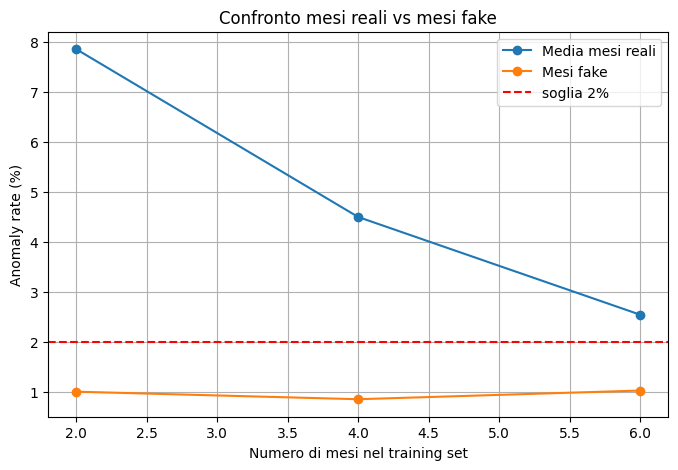

In [16]:
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
real_mean = real_results_df.groupby("window_size")["anomaly rate 0.01"].mean().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])

plt.figure(figsize=(8,5))
plt.plot(real_mean["window_size"], real_mean["anomaly rate 0.01"]*100, "o-", label="Media mesi reali")
plt.plot(fake_results_df["window_size"], fake_results_df["anomaly"]*100, "o-", label="Mesi fake")
plt.axhline(2, color="r", linestyle="--", label="soglia 2%")
plt.xlabel("Numero di mesi nel training set")
plt.ylabel("Anomaly rate (%)")
plt.title("Confronto mesi reali vs mesi fake")
plt.legend()
plt.grid(True)

plt.show()

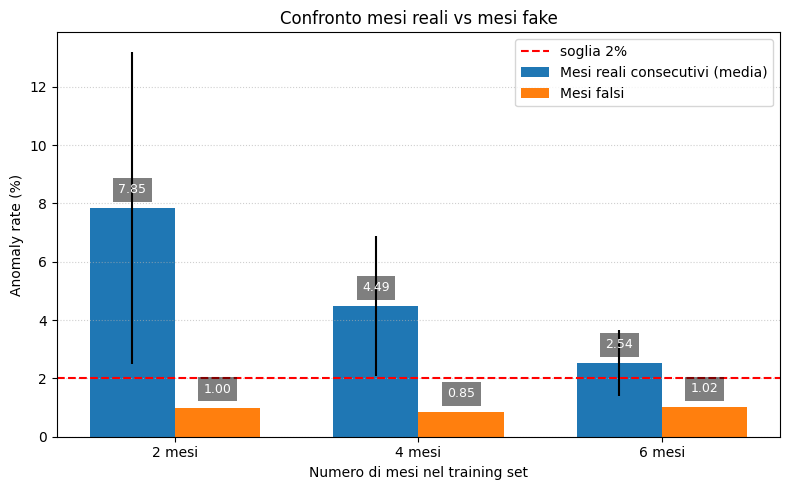

In [17]:
labels = ["2 mesi", "4 mesi", "6 mesi"]
real_results_df = pd.concat([results_df_2m, results_df_4m, results_df_6m])
real_mean = real_results_df.groupby("window_size")["anomaly rate 0.01"].mean().reset_index()
real_std = real_results_df.groupby("window_size")["anomaly rate 0.01"].std().reset_index()

fake_results_df = pd.concat([results_df_2m_fake, results_df_4m_fake, results_df_6m_fake])

x = np.arange(len(labels))
w = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - w/2, real_mean["anomaly rate 0.01"]*100, w, yerr= real_std["anomaly rate 0.01"]*100, label="Mesi reali consecutivi (media)")
bars2 = ax.bar(x + w/2, fake_results_df["anomaly"]*100, w, label="Mesi falsi")
ax.axhline(2, color="r", linestyle="--", label="soglia 2%")
ax.set_xlabel("Numero di mesi nel training set")
ax.set_ylabel("Anomaly rate (%)")
ax.set_title("Confronto mesi reali vs mesi fake")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis="y", linestyle=":", alpha=0.6)

def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.4,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="white",
        bbox = dict(facecolor="black", alpha=0.5, edgecolor="none")
    )

add_labels(bars1)
add_labels(bars2)
plt.tight_layout()
plt.show()

# Dataset con temperatura

In [18]:
df_temp = pd.read_csv("/content/data_temperature.csv", encoding = "utf-8")
df_temp["timestamp"] = pd.to_datetime(df_temp["timestamp"])
df_temp["timestamp"] = df_temp["timestamp"].dt.tz_localize(None)
df_temp = df_temp.sort_values("timestamp")

print(df_temp["temperatura"].describe())
print("Valori mancanti: ", df_temp["temperatura"].isna().sum())

end = "2025-01-01"
new_df = df_temp[(df_temp["timestamp"] < end)]

count    15614.000000
mean        20.786419
std          7.696552
min          6.767842
25%         13.946796
50%         20.040353
75%         27.404328
max         39.536632
Name: temperatura, dtype: float64
Valori mancanti:  0


Finestra di 2 mesi, dati con temperatura

In [19]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 2
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate 0.01": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

          train_months  anomaly rate 0.01
0   [2024-01, 2024-02]           0.637325
1   [2024-02, 2024-03]           0.567393
2   [2024-03, 2024-04]           0.342038
3   [2024-04, 2024-05]           0.200639
4   [2024-05, 2024-06]           0.192500
5   [2024-06, 2024-07]           0.503299
6   [2024-07, 2024-08]           0.728613
7   [2024-08, 2024-09]           0.505178
8   [2024-09, 2024-10]           0.458536
9   [2024-10, 2024-11]           0.296301
10  [2024-11, 2024-12]           0.391841


Finestra di 4 mesi, dati con temperatura

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 4
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate 0.01": anomaly})

results_df = pd.DataFrame(results)
print(results_df)

In [ ]:
#parametri
features = ["Mode 1", "Mode 2", "Mode 3", "Mode 4", "Mode 5", "Mode 6", "temperatura"]
results = []
window_size = 6
n_months = 12
start_date = new_df["timestamp"].min()

for m in range(1, n_months - window_size + 2):
  train_start = start_date + pd.DateOffset(months=m-1)
  train_end = start_date + pd.DateOffset(months=m-1+window_size)
  train_df = new_df[(new_df["timestamp"] >= train_start) & (new_df["timestamp"] < train_end)]

  valid_df = new_df[~new_df["timestamp"].isin(train_df["timestamp"])]

  anomaly = anomaly_rate_LOF(train_df, valid_df, features, n_neighbors=20, contamination=0.01)

  train_months = sorted(train_df["timestamp"].dt.to_period("M").unique())

  results.append({"train_months": [str(x) for x in train_months] , "anomaly rate 0.01": anomaly})

results_df = pd.DataFrame(results)
print(results_df)